In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df=pd.read_csv("../Datasets/alltrails-data.csv")
df.head()

,trail_id,name,area_name,city_name,state_name,country_name,_geoloc,popularity,length,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,features,activities,units
0,10020048,Harding Ice Field Trail,Kenai Fjords National Park,Seward,Alaska,United States,"{'lat': 60.18852, 'lng': -149.63156}",24.8931,15610.598,1161.8976,5,out and back,3.0,5.0,423,"['dogs-no', 'forest', 'river', 'views', 'water...","['birding', 'camping', 'hiking', 'nature-trips...",i
1,10236086,Mount Healy Overlook Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73049, 'lng': -148.91968}",18.0311,6920.162,507.7968,3,out and back,1.0,4.5,260,"['dogs-no', 'forest', 'views', 'wild-flowers',...","['birding', 'camping', 'hiking', 'nature-trips...",i
2,10267857,Exit Glacier Trail,Kenai Fjords National Park,Seward,Alaska,United States,"{'lat': 60.18879, 'lng': -149.631}",17.7821,2896.812,81.9912,1,out and back,3.0,4.5,224,"['dogs-no', 'partially-paved', 'views', 'wildl...","['hiking', 'walking']",i
3,10236076,Horseshoe Lake Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73661, 'lng': -148.915}",16.2674,3379.614,119.7864,1,loop,2.0,4.5,237,"['dogs-no', 'forest', 'lake', 'kids', 'views',...","['birding', 'hiking', 'nature-trips', 'trail-r...",i
4,10236082,Triple Lakes Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73319, 'lng': -148.89682}",12.5935,29772.790,1124.7120,5,out and back,1.0,4.5,110,"['dogs-no', 'lake', 'views', 'wild-flowers', '...","['birding', 'fishing', 'hiking', 'nature-trips...",i


trail_id, name, area_name, city_name, state_name, country_name, _geoloc, popularity, length, elevation_gain, difficulty_rating, route_type, visitor_usage, avg_rating, num_reviews, features, activities, units 

In [3]:

columns_to_check = ['avg_rating', 'difficulty_rating', 'state_name', 'route_type', 'features', 'length', 'elevation_gain', 'visitor_usage', 'activities', 'units']
columns_to_drop = ['trail_id', 'name', 'city_name', 'area_name', 'country_name', '_geoloc', 'visitor_usage', 'avg_rating', 'units']
# Loop through each column and print unique values
for col in columns_to_check:
    unique_vals = df[col].dropna().unique() 
    print(f"\n{col} has {len(unique_vals)} unique value(s):")

    for val in unique_vals[:20]:
        print(f" - {val}")



avg_rating has 10 unique value(s):
 - 5.0
 - 4.5
 - 4.0
 - 3.0
 - 3.5
 - 0.0
 - 2.0
 - 1.0
 - 2.5
 - 1.5

difficulty_rating has 4 unique value(s):
 - 5
 - 3
 - 1
 - 7

state_name has 30 unique value(s):
 - Alaska
 - Arizona
 - Arkansas
 - California
 - Colorado
 - Florida
 - Georgia
 - Indiana
 - Kentucky
 - Maine
 - Michigan
 - Minnesota
 - Missouri
 - Montana
 - Nevada
 - New Mexico
 - North Carolina
 - North Dakota
 - Ohio
 - Oregon

route_type has 3 unique value(s):
 - out and back
 - loop
 - point to point

features has 744 unique value(s):
 - ['dogs-no', 'forest', 'river', 'views', 'waterfall', 'wild-flowers', 'wildlife']
 - ['dogs-no', 'forest', 'views', 'wild-flowers', 'wildlife']
 - ['dogs-no', 'partially-paved', 'views', 'wildlife']
 - ['dogs-no', 'forest', 'lake', 'kids', 'views', 'wild-flowers', 'wildlife']
 - ['dogs-no', 'lake', 'views', 'wild-flowers', 'wildlife']
 - ['dogs-no', 'forest', 'views', 'wildlife']
 - ['dogs-no', 'forest', 'kids', 'views', 'wild-flowers', 'wil

In [4]:
df.isnull().sum()

trail_id               0
name                   0
area_name              0
city_name              0
state_name             0
country_name           0
_geoloc                0
popularity             0
length                 0
elevation_gain         0
difficulty_rating      0
route_type             0
visitor_usage        253
avg_rating             0
num_reviews            0
features               0
activities             0
units                  0
dtype: int64

In [5]:
print(type(df['features'].iloc[0]))

<class 'str'>


In [6]:
import ast 
from sklearn.preprocessing import MultiLabelBinarizer

#one-hot encoding cat columns
categorical_columns_of_note = ['state_name', 'route_type']

df_encoded= pd.get_dummies(df, columns=categorical_columns_of_note, drop_first=True)


df_encoded.head()

,trail_id,name,area_name,city_name,country_name,_geoloc,popularity,length,elevation_gain,difficulty_rating,...,state_name_South Carolina,state_name_South Dakota,state_name_Tennessee,state_name_Texas,state_name_Utah,state_name_Virginia,state_name_Washington,state_name_Wyoming,route_type_out and back,route_type_point to point
0,10020048,Harding Ice Field Trail,Kenai Fjords National Park,Seward,United States,"{'lat': 60.18852, 'lng': -149.63156}",24.8931,15610.598,1161.8976,5,...,False,False,False,False,False,False,False,False,True,False
1,10236086,Mount Healy Overlook Trail,Denali National Park,Denali National Park,United States,"{'lat': 63.73049, 'lng': -148.91968}",18.0311,6920.162,507.7968,3,...,False,False,False,False,False,False,False,False,True,False
2,10267857,Exit Glacier Trail,Kenai Fjords National Park,Seward,United States,"{'lat': 60.18879, 'lng': -149.631}",17.7821,2896.812,81.9912,1,...,False,False,False,False,False,False,False,False,True,False
3,10236076,Horseshoe Lake Trail,Denali National Park,Denali National Park,United States,"{'lat': 63.73661, 'lng': -148.915}",16.2674,3379.614,119.7864,1,...,False,False,False,False,False,False,False,False,False,False
4,10236082,Triple Lakes Trail,Denali National Park,Denali National Park,United States,"{'lat': 63.73319, 'lng': -148.89682}",12.5935,29772.790,1124.7120,5,...,False,False,False,False,False,False,False,False,True,False


## This model only breaks down area by state rather than area and city too.

In [7]:
#breaking up list features
df['features_list'] = df['features'].dropna().apply(ast.literal_eval)

df['features_list'] = df['features_list'].apply(lambda x: x if isinstance(x, list) else [])
mlb = MultiLabelBinarizer()
features_encoded = pd.DataFrame(mlb.fit_transform(df['features_list']), columns=[f'feature__{feat}' for feat in mlb.classes_], index=df.index)

df_encoded = pd.concat([df_encoded, features_encoded], axis=1)
drop_col= [col for col in ['features', 'features_list'] if col in df_encoded.columns]
df_encoded = df_encoded.drop(columns=drop_col)

In [8]:
df_encoded.head()

,trail_id,name,area_name,city_name,country_name,_geoloc,popularity,length,elevation_gain,difficulty_rating,...,feature__lake,feature__partially-paved,feature__paved,feature__rails-trails,feature__river,feature__strollers,feature__views,feature__waterfall,feature__wild-flowers,feature__wildlife
0,10020048,Harding Ice Field Trail,Kenai Fjords National Park,Seward,United States,"{'lat': 60.18852, 'lng': -149.63156}",24.8931,15610.598,1161.8976,5,...,0,0,0,0,1,0,1,1,1,1
1,10236086,Mount Healy Overlook Trail,Denali National Park,Denali National Park,United States,"{'lat': 63.73049, 'lng': -148.91968}",18.0311,6920.162,507.7968,3,...,0,0,0,0,0,0,1,0,1,1
2,10267857,Exit Glacier Trail,Kenai Fjords National Park,Seward,United States,"{'lat': 60.18879, 'lng': -149.631}",17.7821,2896.812,81.9912,1,...,0,1,0,0,0,0,1,0,0,1
3,10236076,Horseshoe Lake Trail,Denali National Park,Denali National Park,United States,"{'lat': 63.73661, 'lng': -148.915}",16.2674,3379.614,119.7864,1,...,1,0,0,0,0,0,1,0,1,1
4,10236082,Triple Lakes Trail,Denali National Park,Denali National Park,United States,"{'lat': 63.73319, 'lng': -148.89682}",12.5935,29772.790,1124.7120,5,...,1,0,0,0,0,0,1,0,1,1


In [9]:
#breaking up list features of activities
df['activities_list'] = df['activities'].dropna().apply(ast.literal_eval)

df['activities_list'] = df['activities_list'].apply(lambda x: x if isinstance(x, list) else [])
mlb = MultiLabelBinarizer()
activities_encoded = pd.DataFrame(mlb.fit_transform(df['activities_list']), columns=[f'activity__{act}' for act in mlb.classes_], index=df.index)
#merge
df_encoded = pd.concat([df_encoded, activities_encoded], axis=1)
#drop if needed
drop_col= [col for col in ['activities', 'activities_list'] if col in df_encoded.columns]
df_encoded = df_encoded.drop(columns=drop_col)

In [10]:
df_encoded.head()

,trail_id,name,area_name,city_name,country_name,_geoloc,popularity,length,elevation_gain,difficulty_rating,...,activity__rock-climbing,activity__scenic-driving,activity__sea-kayaking,activity__skiing,activity__snowboarding,activity__snowshoeing,activity__surfing,activity__trail-running,activity__walking,activity__whitewater-kayaking
0,10020048,Harding Ice Field Trail,Kenai Fjords National Park,Seward,United States,"{'lat': 60.18852, 'lng': -149.63156}",24.8931,15610.598,1161.8976,5,...,0,0,0,0,0,0,0,1,0,0
1,10236086,Mount Healy Overlook Trail,Denali National Park,Denali National Park,United States,"{'lat': 63.73049, 'lng': -148.91968}",18.0311,6920.162,507.7968,3,...,0,0,0,0,0,0,0,0,1,0
2,10267857,Exit Glacier Trail,Kenai Fjords National Park,Seward,United States,"{'lat': 60.18879, 'lng': -149.631}",17.7821,2896.812,81.9912,1,...,0,0,0,0,0,0,0,0,1,0
3,10236076,Horseshoe Lake Trail,Denali National Park,Denali National Park,United States,"{'lat': 63.73661, 'lng': -148.915}",16.2674,3379.614,119.7864,1,...,0,0,0,0,0,0,0,1,1,0
4,10236082,Triple Lakes Trail,Denali National Park,Denali National Park,United States,"{'lat': 63.73319, 'lng': -148.89682}",12.5935,29772.790,1124.7120,5,...,0,0,0,0,0,0,0,1,0,0


In [11]:
df_encoded['log_length'] = np.log1p(df_encoded['length'])
df_encoded['log_elevation_gain'] = np.log1p(df_encoded['elevation_gain'])
df_encoded['log_popularity'] = np.log1p(df_encoded['popularity'])
df_encoded['log_num_reviews'] = np.log1p(df_encoded['num_reviews'])


# Dropping the original and leaving only log transformations

In [12]:
df_encoded = df_encoded.drop(columns = ['length', 'elevation_gain', 'popularity','num_reviews'])
X = df_encoded.drop(columns = columns_to_drop)
Y = df_encoded['avg_rating']
X.head()

,difficulty_rating,state_name_Arizona,state_name_Arkansas,state_name_California,state_name_Colorado,state_name_Florida,state_name_Georgia,state_name_Hawaii,state_name_Indiana,state_name_Kentucky,...,activity__snowboarding,activity__snowshoeing,activity__surfing,activity__trail-running,activity__walking,activity__whitewater-kayaking,log_length,log_elevation_gain,log_popularity,log_num_reviews
0,5,False,False,False,False,False,False,False,False,False,...,0,0,0,1,0,0,9.655769,7.058670,3.253977,6.049733
1,3,False,False,False,False,False,False,False,False,False,...,0,0,0,0,1,0,8.842339,6.232049,2.946074,5.564520
2,1,False,False,False,False,False,False,False,False,False,...,0,0,0,0,1,0,7.971711,4.418735,2.932904,5.416100
3,1,False,False,False,False,False,False,False,False,False,...,0,0,0,1,1,0,8.125813,4.794024,2.848820,5.472271
4,5,False,False,False,False,False,False,False,False,False,...,0,0,0,1,0,0,10.301384,7.026171,2.609592,4.709530


In [13]:

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.2, random_state=42)
model = LinearRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
r2 = r2_score(Y_test, Y_pred)

print(" Model Metrics:")
print(f" - RMSE: {rmse:.4f}")
print(f" - R2 Score: {r2:.4f}")


 Model Metrics:
 - RMSE: 0.7451
 - R2 Score: 0.1525


In [14]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, Y_train)
y_pred_rf = rf.predict(X_test)

# Fingers crossed
def evaluate_model(name, Y_test, y_pred):
    rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
    r2 = r2_score(Y_test, y_pred)
    print(f"\n🔍 {name} Evaluation:")
    print(f" - RMSE: {rmse:.4f}")
    print(f" - R² Score: {r2:.4f}")

evaluate_model("Random Forest", Y_test, y_pred_rf)



🔍 Random Forest Evaluation:
 - RMSE: 0.4334
 - R² Score: 0.7133


In [15]:
# XGBoost
xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X_train, Y_train)
y_pred_xgb = xgb.predict(X_test)

evaluate_model("XGBoost", Y_test, y_pred_xgb)



🔍 XGBoost Evaluation:
 - RMSE: 0.4527
 - R² Score: 0.6872


In [16]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Parameter grid
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None] 
}

# Random Search
rf = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=30,
    scoring='r2',
    cv=5,
    random_state=42,
    verbose=1,
    n_jobs=-1
)

random_search.fit(X_train, Y_train)
best_rf = random_search.best_estimator_

# Evaluate on test set
y_pred_best = best_rf.predict(X_test)
evaluate_model("Tuned Random Forest", Y_test, y_pred_best)
print("Base was .7137 R2, New Best parameters found:")
print(random_search.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits

🔍 Tuned Random Forest Evaluation:
 - RMSE: 0.4304
 - R² Score: 0.7173
Base was .7137 R2, New Best parameters found:
{'max_depth': 10, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 127}


In [17]:
from scipy.stats import uniform

xgb = XGBRegressor(random_state=42)

param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [3, 5, 7, 10],
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': [0, 1, 5]
}

random_search_xgb = RandomizedSearchCV(
    xgb,
    param_distributions=param_dist,
    n_iter=30,
    scoring='r2',
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

random_search_xgb.fit(X_train, Y_train)
best_xgb = random_search_xgb.best_estimator_

# Evaluate
y_pred_xgb = best_xgb.predict(X_test)
evaluate_model("Tuned XGBoost", Y_test, y_pred_xgb)
print("Best XGBoost params:")
print(random_search_xgb.best_params_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits

🔍 Tuned XGBoost Evaluation:
 - RMSE: 0.4435
 - R² Score: 0.6998
Best XGBoost params:
{'colsample_bytree': np.float64(0.9637281608315128), 'gamma': 1, 'learning_rate': np.float64(0.2087566853061946), 'max_depth': 5, 'n_estimators': 489, 'subsample': np.float64(0.6831766651472755)}


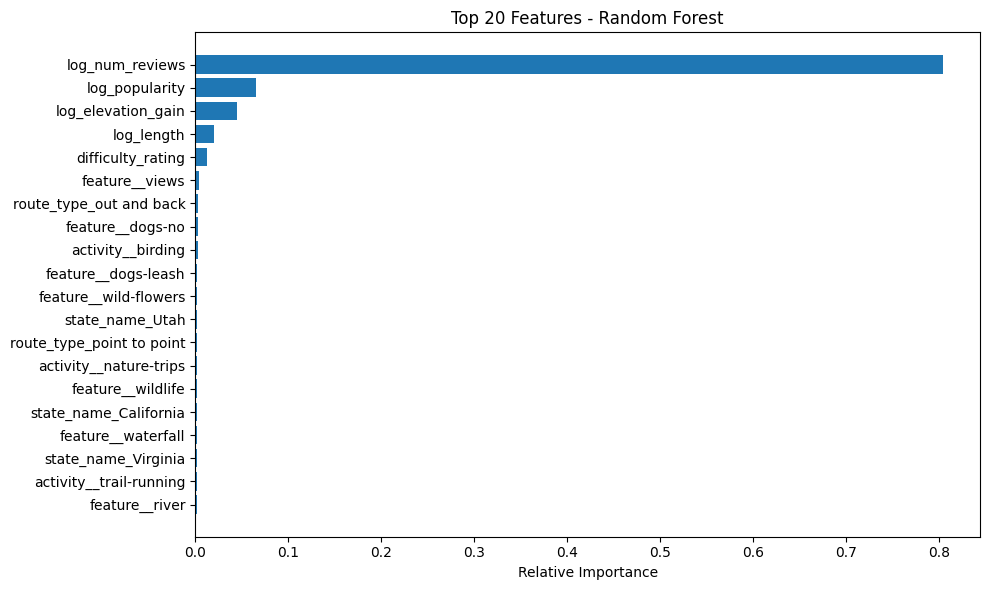

In [19]:
importances = best_rf.feature_importances_
indices = np.argsort(importances)[-20:][::-1]
feature_names = X_train.columns[indices]

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), feature_names)
plt.xlabel('Relative Importance')
plt.title('Top 20 Features - Random Forest')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [21]:
top_features = [
    'log_num_reviews',
    'log_popularity',
    'log_elevation_gain',
    'log_length',
    'difficulty_rating',
    'feature__views',
    'route_type_out and back',
    'feature__dogs-no',
    'feature__dogs-leash',
    'activity__birding',
    'feature__wild-flowers',
    'state_name_Utah',
    'route_type_point to point',
    'activity__nature-trips',
    'feature__wildlife',
    'state_name_California',
    'feature__waterfall',
    'state_name_Virginia',
    'activity__trail-running',
    'feature__river',
    'activity__walking',
    'activity__snowshoeing',
]

X_train_trimmed = X_train[top_features]
X_test_trimmed = X_test[top_features]

best_xgb_trimmed = XGBRegressor(**random_search_xgb.best_params_)
best_xgb_trimmed.fit(X_train_trimmed, Y_train)
y_pred_trimmed = best_xgb_trimmed.predict(X_test_trimmed)

evaluate_model("Trimmed XGBoost", Y_test, y_pred_trimmed)


🔍 Trimmed XGBoost Evaluation:
 - RMSE: 0.4342
 - R² Score: 0.7123


In [22]:
from scipy.stats import uniform

xgb = XGBRegressor(random_state=42)

param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [3, 5, 7, 10],
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': [0, 1, 5]
}

random_search_xgb = RandomizedSearchCV(
    xgb,
    param_distributions=param_dist,
    n_iter=30,
    scoring='r2',
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

random_search_xgb.fit(X_train_trimmed, Y_train)
best_xgb = random_search_xgb.best_estimator_

# Evaluate
y_pred_xgb = best_xgb.predict(X_test_trimmed)
evaluate_model("Tuned XGBoost", Y_test, y_pred_xgb)
print("Best XGBoost params:")
print(random_search_xgb.best_params_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits

🔍 Tuned XGBoost Evaluation:
 - RMSE: 0.4330
 - R² Score: 0.7139
Best XGBoost params:
{'colsample_bytree': np.float64(0.6943939678995823), 'gamma': 1, 'learning_rate': np.float64(0.15813867890931724), 'max_depth': 3, 'n_estimators': 306, 'subsample': np.float64(0.7710164073434198)}
